In [10]:
include("../EuclidElements.jl");

# Book 1

## Proposition 3 

Given two unequal straight lines, to cut off from the greater a straight line equal to the less.

In [2]:
""" Generate Points A, B, and line C for I.3 """
function gen_start()
    # Let AB, C be the two given unequal straight lines, 
    A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
    B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
    C = [Point2f0(-0.5, 1.5f0), Point2f0(rand(Uniform(-0.75f0, 1f0)), 1.5f0)]
    #   and let AB be the greater of them.
    while norm(B-A) <= norm(C[2]-C[1])
        A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
        B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
    end

    [A, B, C]
end;

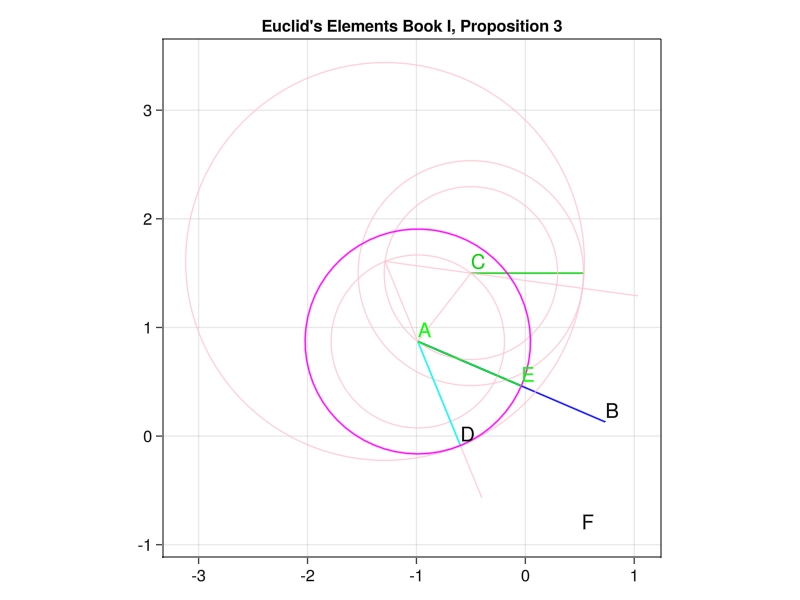

In [7]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 3")

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB, C be the two given unequal straight lines, and let AB be the greater of them.
A, B, C = gen_start()
AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:green3)

# Thus it is required to cut off from AB the greater a straight line equal to C the less.

# At the point A let AD be placed equal to the straight line C; [I.2]
AD = equivalent_line(A, C[1], C[2], color=:pink)
fill_equivalent(AD)
D = Point(AD)
ADline = lines!([A,D], color=:cyan)

# and with centre A and distance AD let the circle DEF be described. [Post. 3]
#           ASIDE: F is an arbitrary point on the circle, E is the intersection of AB and DEF
r_DEF = norm(A-D)
DEF = lines!(Circle(A, r_DEF),color=:magenta)
F = Point2f(r_DEF/2f0, -r_DEF*(√3f0)/2f0)
v = B - A
u = v / norm(v)
E = A + r_DEF*u

# Now, since the point A is the centre of the circle DEF,
#   AE is equal to AD. [Def. 15]
AE = lines!([A,E], color=:green1)

# But C is also equal to AD.
# Therefore each of the straight lines AE, C is equal to AD;
#   so that AE is also equal to C. [C.N. 1]

# Therefore, given the two straight lines AB, C, from AB the greater AE has been cut off equal to C the less.

# Being what it was required to do


#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=:green3)
Dpoint = text!(D, text="D", color=:black)
Epoint = text!(E, text="E", color=:green1)
Fpoint = text!(F, text="F", color=:black)

#Draw and show the chart :)
current_figure()

### Animation

In [8]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 3")
xlims!(ax, -4.5,2)
ylims!(ax, -2,4)

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB, C be the two given unequal straight lines, and let AB be the greater of them.
#           ASIDE : Will use same points defined above -- uncomment this definition if new points are needed
#A, B, C = gen_start()
AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:green3)

# Thus it is required to cut off from AB the greater a straight line equal to C the less.

# At the point A let AD be placed equal to the straight line C; [I.2]
AD = equivalent_line(A, C[1], C[2], color=:pink, linewidth=5f0, cursorlw=0.02f0)
D = Point(AD)
#ADline = straight_line(A, D, color=:pink, linewidth=5f0, cursorwidth=0.02f0)

# and with centre A and distance AD let the circle DEF be described. [Post. 3]
#           ASIDE: F is an arbitrary point on the circle, E is the intersection of AB and DEF
r_DEF = norm(A-D)
v = B - A
u = v / norm(v)
E = A + r_DEF*u
DEF = whole_circle(A, r_DEF, vector_angle(A, E), color=:pink, linewidth=5f0)
F = Point2f(r_DEF/2f0, -r_DEF*(√3f0)/2f0)

# Now, since the point A is the centre of the circle DEF,
#   AE is equal to AD. [Def. 15]
AE = straight_line(A, E, color=:green1, linewidth=5f0, cursorwidth=0.02f0)

AE_AD = compare_lines(A, E, A, D, Point2f0(-3, -1), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)

# But C is also equal to AD.
C_AD = compare_lines(C[1], C[2], A, D, Point2f0(-2.75, -1), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)
# Therefore each of the straight lines AE, C is equal to AD;
#   so that AE is also equal to C. [C.N. 1]
AE_C = compare_lines(A, E, C[1], C[2], Point2f0(-2.5, -1), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)

# Therefore, given the two straight lines AB, C, from AB the greater AE has been cut off equal to C the less.

# Being what it was required to do


#Now draw the point labels
Apoint = text!(A, text="A", color=RGB(0.0, 0.8, 0.0))
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=:green3)
EAlpha = Observable(0f0)
Epoint = text!(E, text="E", color=@lift(RGBA(0.0, 0.8, 0.0, $EAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
t_rots = 7π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "Euclid-I-03.01.gif", timestamps; framerate=framerate) do t

    # animate the drawing setup
    animate_equivalent(AD, 0.5f0π, 3f0π, t, fade_start=4π, fade_end=5π)
    animate_circle(DEF, 3f0π, 3.5f0π, t, fade_start=4π, fade_end=5π)


    # Animate showing the point E
    if t > 3.5π && t <= 4π
        showL = (t - 3.5π)/0.5π
        EAlpha[] = showL
    elseif t > 4π
        EAlpha[] = 1f0
    end
    # Animate drawing AL
    animate_line(AE, 3.5f0π, 4f0π, t)

    # animate the line comparisons
    animate_linecompare(AE_AD, 4f0π, 4.5f0π, t, fade_start=6π, fade_end=6.5π)
    animate_linecompare(C_AD, 4.5f0π, 5f0π, t, fade_start=6π, fade_end=6.5π)
    animate_linecompare(AE_C, 5f0π, 5.5f0π, t, fade_start=6π, fade_end=6.5π)
end;

![animation](Euclid-I-03.01.gif)

#### Using Reusable Animations

In [11]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 3")
xlims!(ax, -4.5,2)
ylims!(ax, -2,3.5)

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB, C be the two given unequal straight lines, and let AB be the greater of them.
#           ASIDE : Will use same points defined above -- uncomment this definition if new points are needed
#A, B, C = gen_start()
AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:green3)

# Thus it is required to cut off from AB the greater a straight line equal to C the less.

# At the point A let AD be placed equal to the straight line C; [I.2]

# and with centre A and distance AD let the circle DEF be described. [Post. 3]

cutline = draw_cut_line(A, B, C[1], C[2], color=:pink, linewidth=5f0, cursorlw=0.02f0)
E = Point(cutline)

# Now, since the point A is the centre of the circle DEF,
#   AE is equal to AD. [Def. 15]
AE = straight_line(A, E, color=:green1, linewidth=5f0, cursorwidth=0.02f0)

# But C is also equal to AD.
# Therefore each of the straight lines AE, C is equal to AD;
#   so that AE is also equal to C. [C.N. 1]
AE_C = compare_lines(A, E, C[1], C[2], Point2f0(-2.5, -1), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=1f0)

# Therefore, given the two straight lines AB, C, from AB the greater AE has been cut off equal to C the less.

# Being what it was required to do


#Now draw the point labels
Apoint = text!(A, text="A", color=RGB(0.0, 0.8, 0.0))
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=:green3)
EAlpha = Observable(0f0)
Epoint = text!(E, text="E", color=@lift(RGBA(0.0, 0.8, 0.0, $EAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
t_rots = 6π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "Euclid-I-03.02.gif", timestamps; framerate=framerate) do t

    # animate the drawing setup
    animate_cut_line(cutline, 0.5f0π, 3f0π, t, fade_start=4π, fade_end=5π)


    # Animate showing the point E
    if t > 3π && t <= 3.5π
        showE = (t - 3π)/0.5π
        EAlpha[] = showE
    elseif t > 3.5π
        EAlpha[] = 1f0
    end
    # Animate drawing AL
    animate_line(AE, 3f0π, 4f0π, t)

    # animate the line comparisons
    animate_linecompare(AE_C, 4f0π, 4.5f0π, t, fade_start=5π, fade_end=5.5π)
end;

![animation](Euclid-I-03.02.gif)